# Lab 6

## Problem 1

For the LHC data, we are going to have to fake a background. Make a Poisson background with mean 100. 
The first problem is to look at your background distribution and determine where the 5$\sigma$ sensitivity threshold is.

In [97]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pandas as pd
import pickle
import math

plt.rcParams["figure.figsize"] = (20,15)

0.9999997133484281
154.0


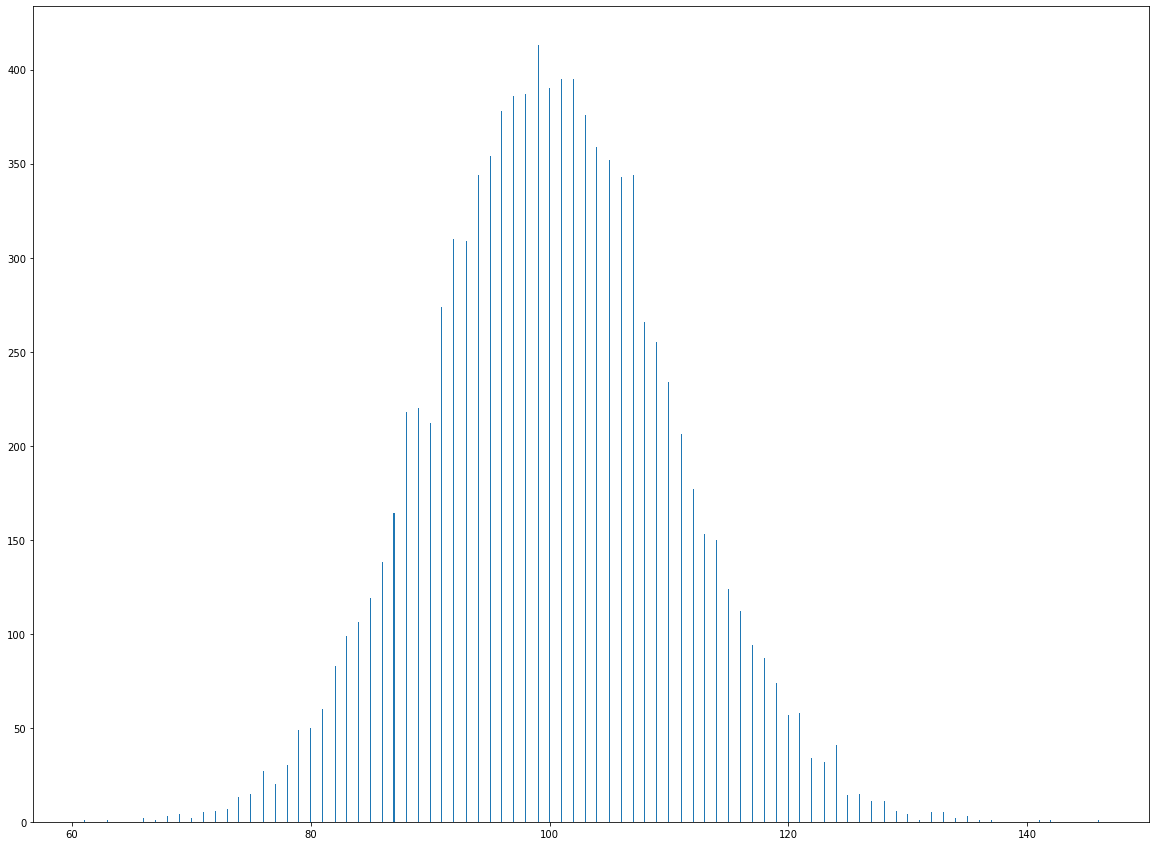

In [98]:
fake_bkgd= stats.poisson.rvs(100, size=10000)
sigma_val= stats.norm.cdf(5)
print(sigma_val)
sigma_bkgd=stats.poisson.ppf(sigma_val,100)
print(sigma_bkgd)
plt.hist(fake_bkgd, bins=1000)
plt.show()

## Problem 2

Now inject a signal of known strength. You will want to make your signal moderately strong, say somewhere in the 8-30$\sigma$ range. Inject this signal into your background data many times.

a) Histogram how bright the observed signal appears to be, and discuss it's shape. Say in words what this histogram is telling you.

I choose the signal around 8$\sigma$ and injected it 10000 time

In [99]:
sigma_val= stats.norm.cdf(8)
sigma_bkgd=stats.poisson.ppf(sigma_val,100)
print('events =',sigma_bkgd)

events = 190.0


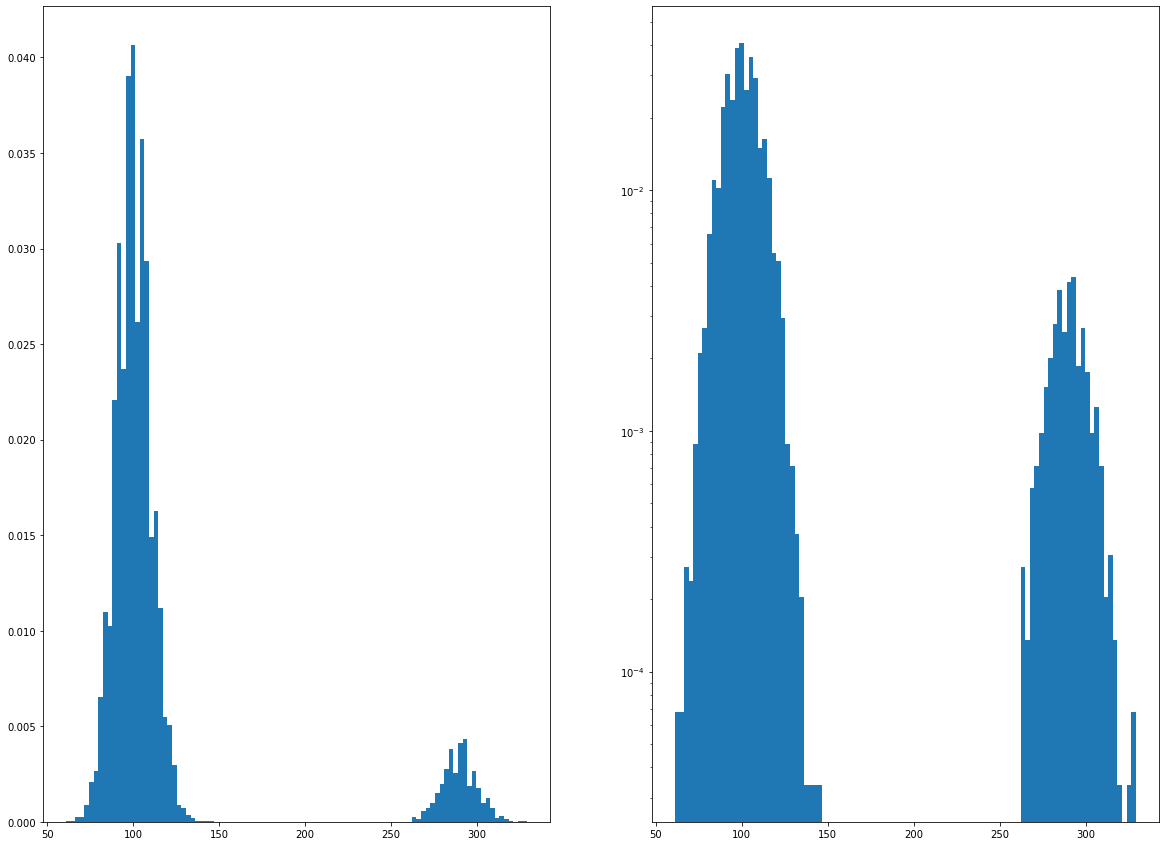

In [100]:
signal = 190 + stats.poisson.rvs(100, size=1000)
data = np.append(signal,fake_bkgd)
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.hist(data,density=True,bins=100)
ax2.hist(data,density=True,bins=100)
ax2.set_yscale('log')

In the plots above, we can see that the signal is brighter than the background. Its poisson distribution and the background mean is still at 100. And the mean of the signal observed is round 290, which close to the signal we injected in. 

b) Is your observed signal biased? (e.g. is the observed value equally likely to be stronger or weaker than the true injected signal?) Is it symmetric?

The observed signal is biased and I think it is stronger than the true injected signal because the observed signal is around 290 which is higher than the injected signal (190). It is kind of symmetric.

## Problem 3 

Now make a suite of injected signals. You will want to have a range of injected signal strengths, starting at zero and extending well above 5$\sigma$ (30$\sigma$ or more). You will want to follow the work you did for Homework 5 very closely.

a) Clearly state what you are simulating, and make a 2D histogram of injected signal vs. observed data

Lets choose the range of injected signal strengths from 0-30$\sigma$. Then we will injected a million uniformly distributed signals in to our data. We are simulating the true signal that look like background.

In [101]:
sig=0
events=100
while sig < 31:
    prob = stats.poisson.sf(events,100)
    sig = stats.norm.isf(prob)
    if(sig < 31):
        events= events+1
print(events)

546


In [102]:
bkgd=stats.poisson.rvs(100, size = 1000000)
signal = stats.randint.rvs(100,546,size = 1000000)
data = signal + bkgd

Text(0.5, 0, 'Observed data, $P(d|s)$')

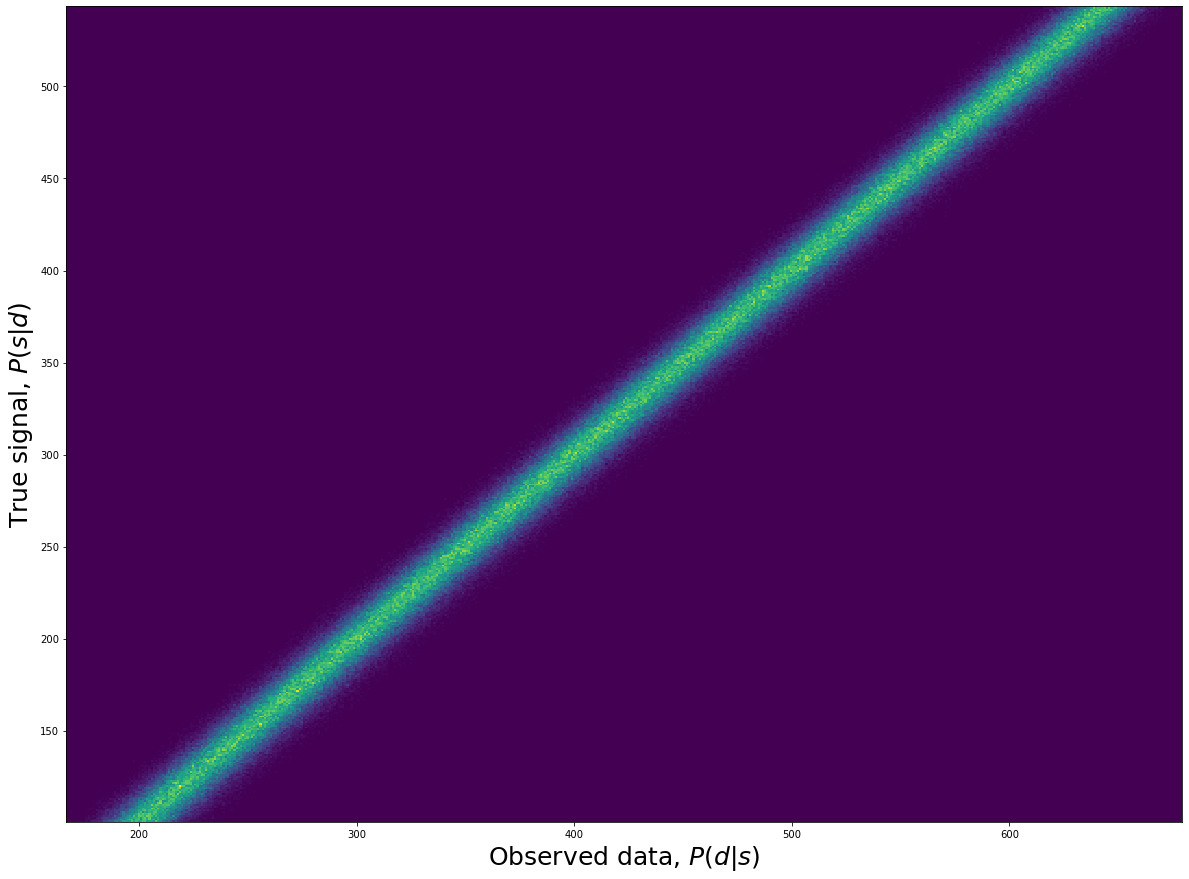

In [103]:
signaledges = np.array(range(np.min(signal), np.max(signal)))
dataedges = np.array(range(np.min(data), np.max(data)))

Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 25)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 25)

b) For the same injected signal power as in problem 2, show that you get the same answer.

Text(0.5, 1.0, 'Normalized data slice from 2d histogram')

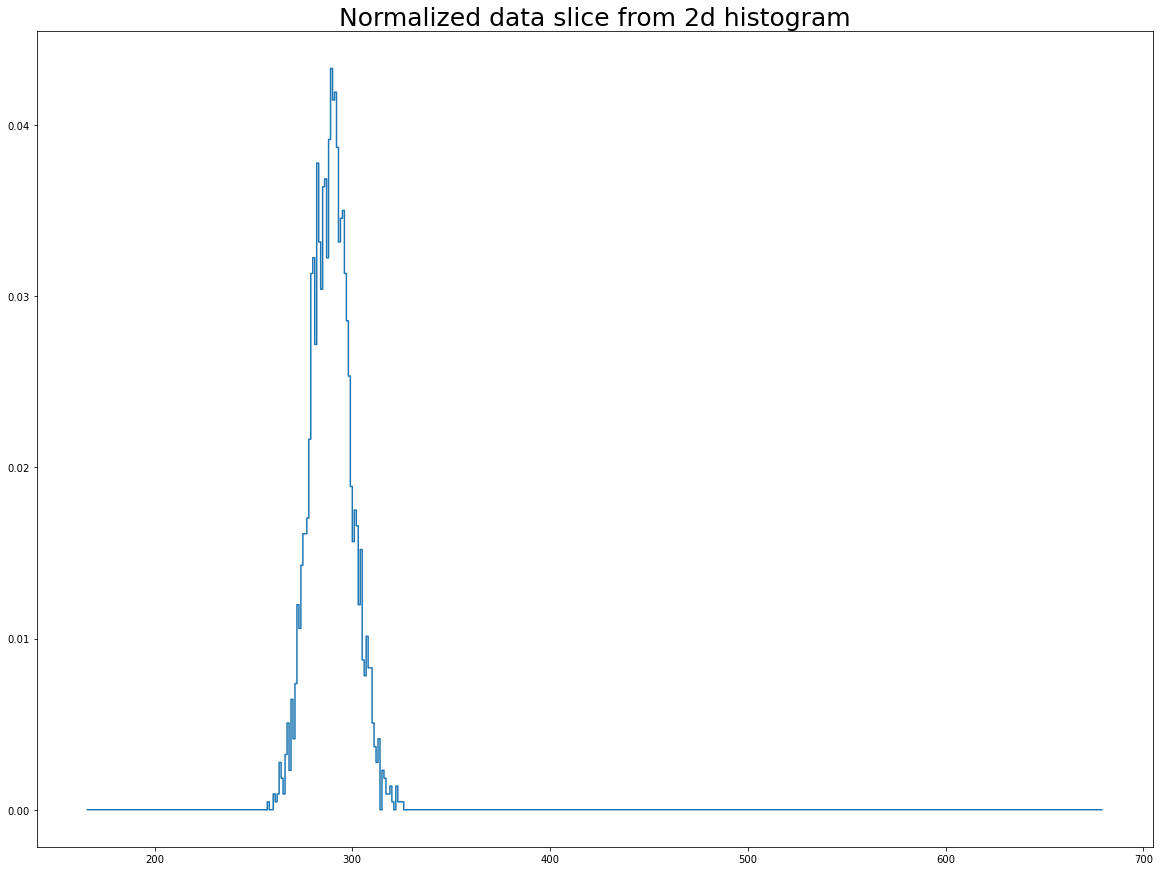

In [104]:
plt.step(temp[:-1], Psd[:,90]/np.sum(Psd[:,90]))
plt.title('Normalized data slice from 2d histogram', fontsize=25)

Text(0.5, 1.0, 'For the same injected signal from problem 2')

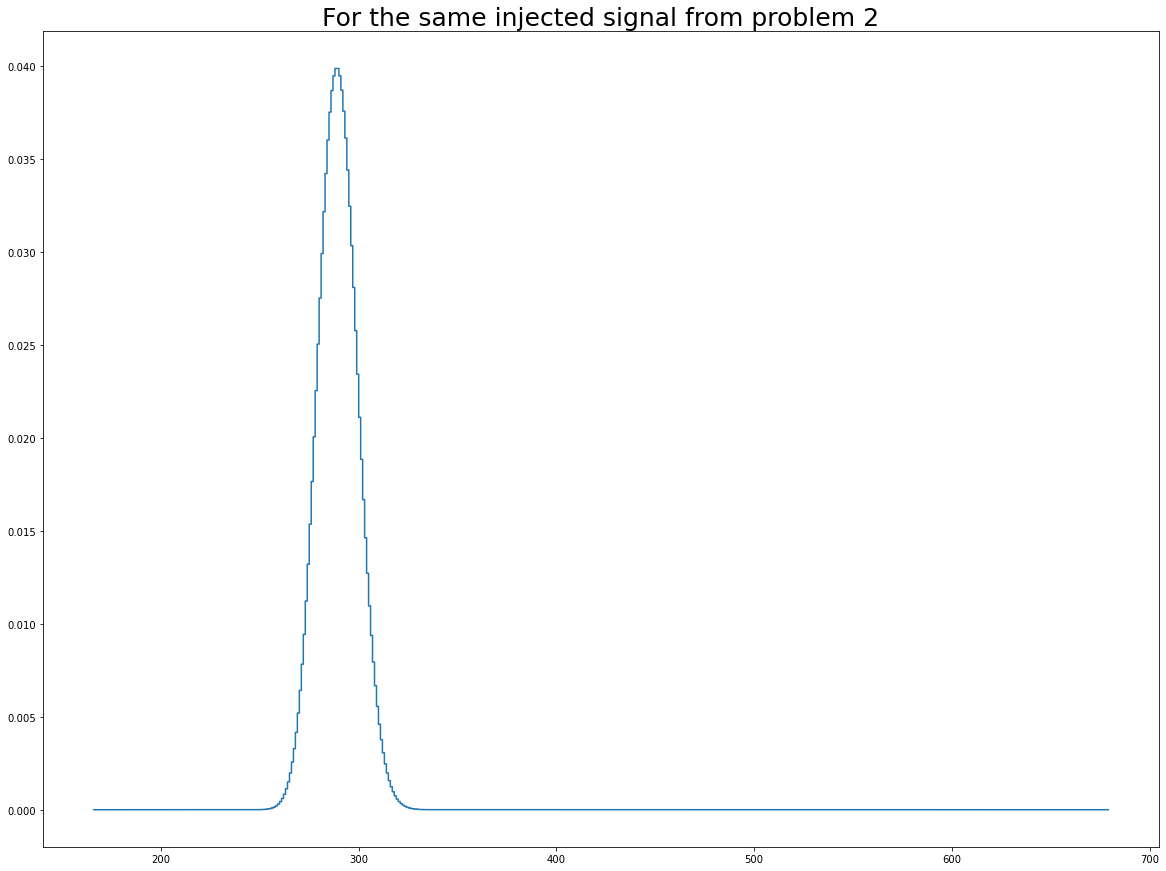

In [105]:
plt.step(temp[:-1],stats.poisson.pmf(temp[:-1],100,loc=190))
plt.title('For the same injected signal from problem 2', fontsize=25)

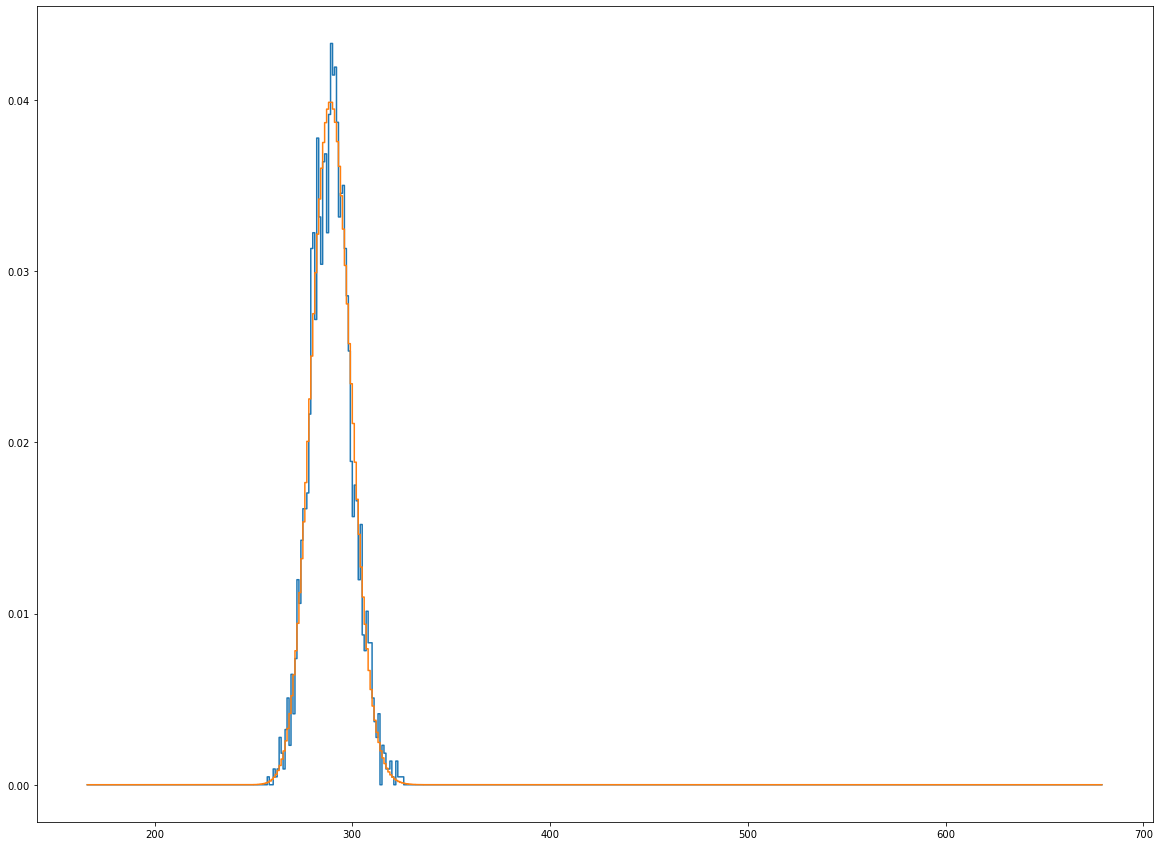

In [106]:
plt.step(temp[:-1], Psd[:,90]/np.sum(Psd[:,90]))
plt.step(temp[:-1],stats.poisson.pmf(temp[:-1],100,loc=190))

We can see that we get the same answer.

c) Now reverse the problem, select an observed data value (pick something quite a bit stronger than 5$\sigma$) and create a 1D histogram of the true signal probability given the observed data. Describe the meaning of this histogram.

I select an observed data value of 300 (stronger than 5$\sigma$ which is 154)

Text(0.5, 1.0, 'P(s|d) of observed signal of 300')

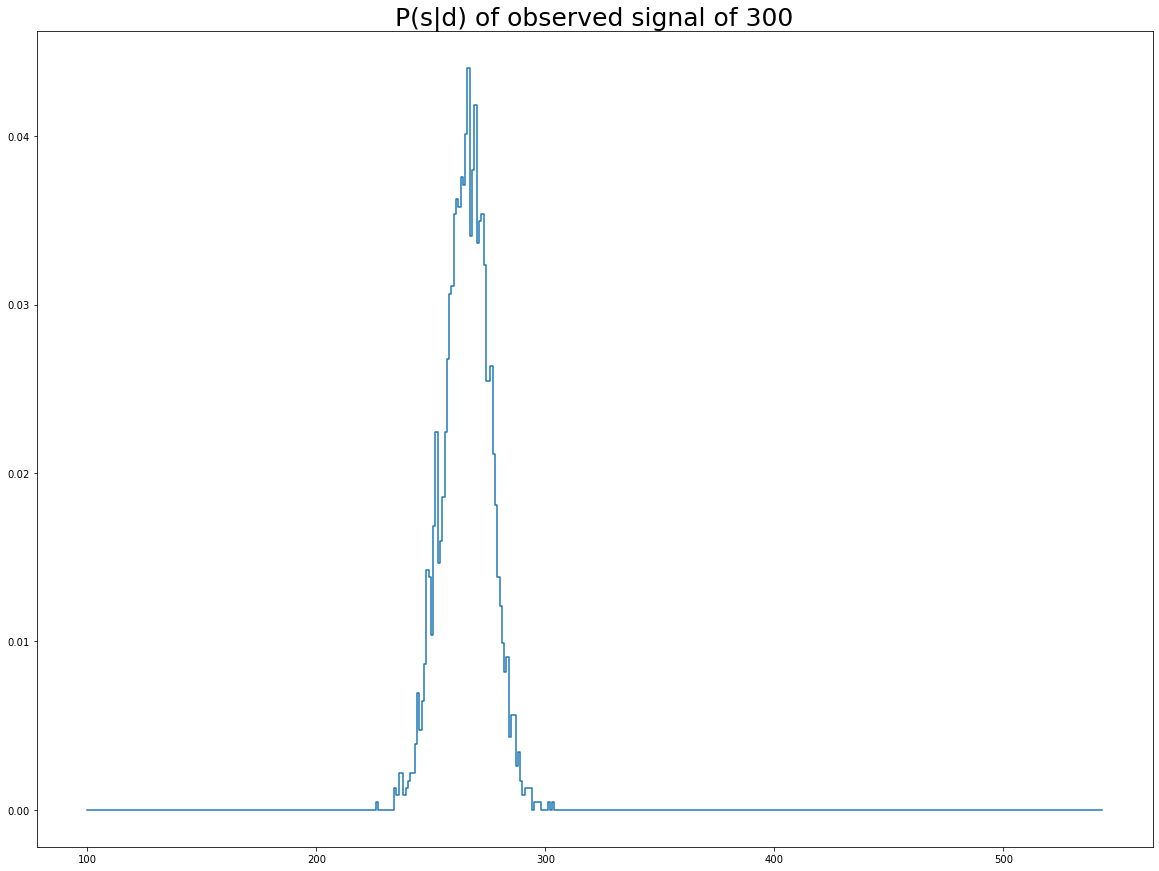

In [107]:
plt.step(temp2[:-1],Psd[200,:]/np.sum(Psd[200,:]))
plt.title('P(s|d) of observed signal of 300',fontsize = 25)

This histogram shows the probalibity for the injected signals that cause an observed signal of 300.

d) For your observed signal, what is the 1$\sigma$ uncertainty on the true signal strength?

In [108]:
mean=np.sum(signalcenters*Psd[200,:]/np.sum(Psd[200,:]))
print(mean)
up = stats.poisson.ppf(stats.norm.cdf(1),mean)
low = stats.poisson.ppf(stats.norm.sf(1),mean)
un=(up-low)/2
print(up,low,un)

266.5125161847217
283.0 250.0 16.5


The 1$\sigma$ uncertainty on the true signal when we observed signal of 300 is $\pm$16 events 

e) Discuss the answer to part d in some depth. Is it symmetric? Is it biased? Does this make sense?

I think it is roughly symmetric since the bound of 1$\sigma$ but the histogram still look poisson so I think it won't be symmetric anymore if we look at the 5$\sigma$ bound. It is biased since the injected signals is not match with the observed signal and is outside of the uncertainty, lower than our obsered signal. This make sense because we observed both true signal and background signal so the true signal would be less than what we observed. 